In [1]:
# Clonando o repositório com o dataset
!git clone https://github.com/DanielOlliveira/recomendacao-dataset.git

# Definindo o caminho para o dataset
DATASET_PATH = "/content/recomendacao-dataset"

# Listando as classes disponíveis
import os
classes = os.listdir(DATASET_PATH)
print("Classes encontradas:", classes)


Cloning into 'recomendacao-dataset'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 209 (delta 0), reused 206 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (209/209), 26.14 MiB | 16.41 MiB/s, done.
Classes encontradas: ['mochila escolar', 'relógio de pulso', '.git', 'README.md', 'fones de ouvido bluetooth', 'óculos de sol']


In [2]:
# Instalando bibliotecas necessárias
!pip install tensorflow keras opencv-python matplotlib

# Importando pacotes
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [3]:
# Carregando MobileNetV2 sem a camada de classificação
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

/tmp/ipython-input-575928455.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Função para extrair features de uma imagem
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()


In [7]:
feature_list = []
image_paths = []

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)

    # Verifica se é uma pasta antes de tentar listar arquivos
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                features = extract_features(img_path, model)
                feature_list.append(features)
                image_paths.append(img_path)
            except:
                print(f"Erro ao processar: {img_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2

def find_similar(query_img_path, feature_list, image_paths, model, top_n=5):
    # Extrai features da imagem de consulta
    query_features = extract_features(query_img_path, model)
    similarities = cosine_similarity([query_features], feature_list)[0]
    top_indices = np.argsort(similarities)[-top_n:][::-1]

    # Mostra imagem de origem
    print("Origem")
    query_img = cv2.imread(query_img_path)
    plt.imshow(cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB))
    plt.title("Imagem de Origem")
    plt.axis('off')
    plt.show()

    # Mostra recomendações
    print("\nRecomendações")
    for idx in top_indices:
        img = cv2.imread(image_paths[idx])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Similaridade: {similarities[idx]:.2f}")
        plt.axis('off')
        plt.show()


--2025-09-13 07:40:18--  https://raw.githubusercontent.com/DanielOlliveira/recomendacao-dataset/master/consulta/relogio_timewear.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77147 (75K) [image/png]
Saving to: ‘relogio_timewear.png’

relogio_timewear.pn 100%[===================>]  75.34K  --.-KB/s    in 0.003s  

2025-09-13 07:40:19 (27.0 MB/s) - ‘relogio_timewear.png’ saved [77147/77147]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Origem


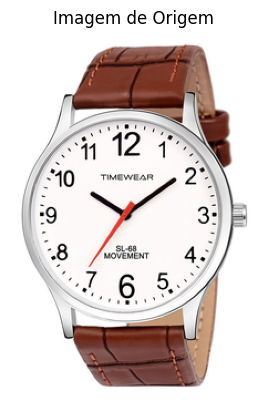


Recomendações


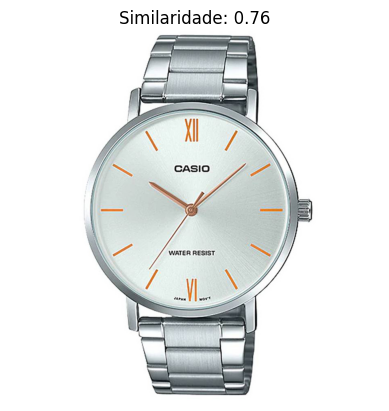

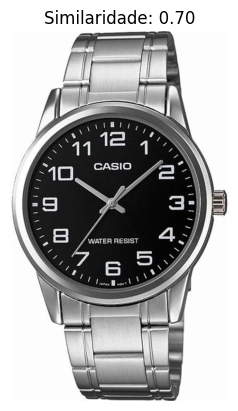

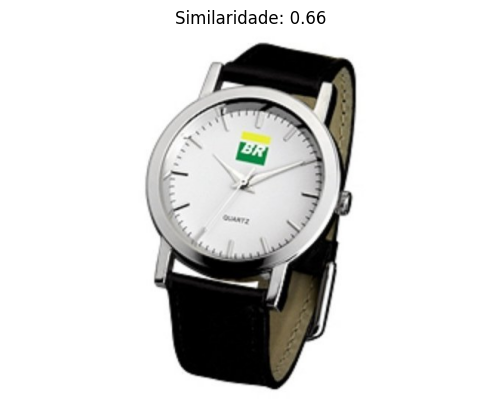

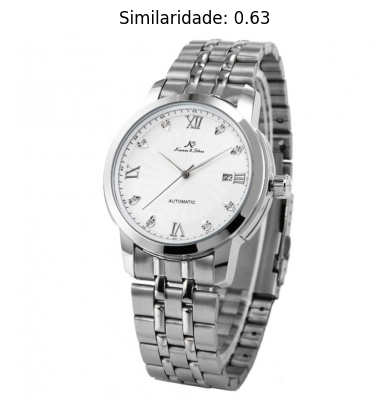

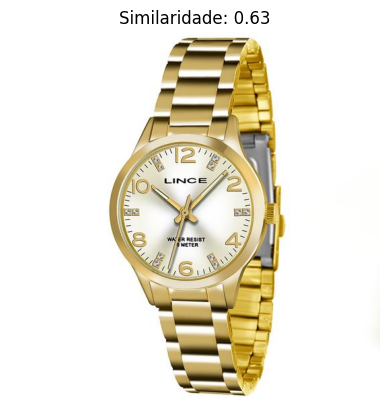

In [13]:
# Baixando imagem de consulta do GitHub
!wget https://raw.githubusercontent.com/DanielOlliveira/recomendacao-dataset/master/consulta/relogio_timewear.png

# Usando a imagem no teste
query_img_path = "relogio_timewear.png"
find_similar(query_img_path, feature_list, image_paths, model)